## 1. Mount the Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


# Part 1: Data Visualization of the damaged car parts

## 2. Import the necessary libraries

In [2]:
import numpy as np 
import pandas as pd 

import os
for directoryname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(directoryname, filename))

In [3]:
pwd

'/content'

#### Download the git repository of cocoapi 

In [4]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-h461nwf0
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-h461nwf0
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263902 sha256=50f9d5a68141bd2e9ebdce4199a26a4a8271ddce991c5d20cd7c53e5069b7e59
  Stored in directory: /tmp/pip-ephem-wheel-cache-6wfmekit/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


#### Import the required visualization libraries 

In [5]:
%matplotlib inline 
# magic function that renders the figure in a notebook
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0) # Define the width, height of figure in inches
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

## 3. Define the dataset diectories for validation images

In [6]:
data_directory='/content/drive/MyDrive/CarPartsDamageDetection/archive/val'
data_type='COCO_validation_annotations'
multiple_data_types='COCO_multiple_validation_annotations'
ann_file='{}/{}.json'.format(data_directory,data_type)
multiple_ann_files='{}/{}.json'.format(data_directory,multiple_data_types)
image_directory = '/content/drive/MyDrive/CarPartsDamageDetection/archive/img'

## 4. Initialize coco api for instance annotations


In [7]:
coco=COCO(ann_file)
multiple_coco=COCO(multiple_ann_files)

loading annotations into memory...
Done (t=1.26s)
creating index...
index created!
loading annotations into memory...
Done (t=0.65s)
creating index...
index created!


## 5. Display categories and supercategories

#### 1) Single Class and Damage dataset

In [8]:
categories = coco.loadCats(coco.getCatIds())
names=[category['name'] for category in categories]
print('COCO categories for damages: \n{}\n'.format(', '.join(names)))

names = set([category['supercategory'] for category in categories])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(names)))

#Multi Class #Parts dataset
multiple_categories = multiple_coco.loadCats(multiple_coco.getCatIds())
multiple_names=[category['name'] for category in multiple_categories]
print('COCO categories for parts: \n{}\n'.format(', '.join(multiple_names)))

multiple_names = set([multiple_category['supercategory'] for multiple_category in multiple_categories])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(multiple_names)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



## 6. Find all images containing 'damage' categories and select one category at random


In [9]:
category_Ids = coco.getCatIds(catNms=['damage']);
image_Ids = coco.getImgIds(catIds=category_Ids );

In [10]:
print(category_Ids)

[1]


In [11]:
print(image_Ids)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


##### Choosing one category at random

In [12]:
random_image_id = random.choice(image_Ids)
print(" Image Id = {} was selected at random from this {} list".format(random_image_id, image_Ids))

 Image Id = 10 was selected at random from this [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


## 7. Load the randomly selected image 

In [13]:
image_Id = coco.getImgIds(imgIds = [random_image_id])
image = coco.loadImgs(image_Id)[0]
print("Image details \n",image)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '9.jpg', 'flickr_url': '', 'height': 1024, 'id': 10, 'license': 1, 'width': 1024}


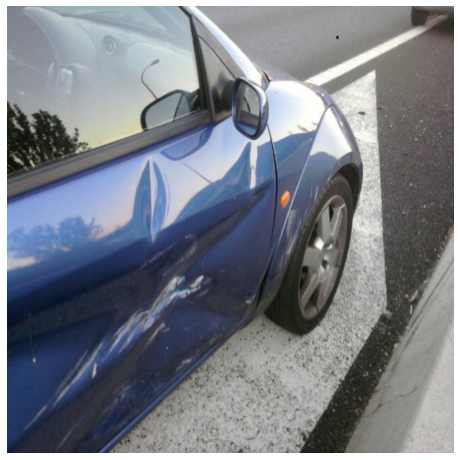

In [14]:
I = io.imread(image_directory + '/' + image['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

## 8. Obtain the damage annotations for that particular image

In [15]:
annotation_Ids = coco.getAnnIds(imgIds=image_Id,iscrowd=None)
annotation_files = coco.loadAnns(annotation_Ids)

In [16]:
print(annotation_Ids)

[21, 22, 23]


In [17]:
print(annotation_files)

[{'area': 28971.00000000098, 'bbox': [77, 617, 373, 357], 'category_id': 1, 'id': 21, 'image_id': 10, 'iscrowd': 0, 'segmentation': [[77, 924, 172, 801, 223, 756, 289, 703, 342, 687, 356, 649, 390, 620, 409, 624, 392, 649, 411, 648, 430, 624, 450, 617, 450, 636, 446, 656, 402, 672, 354, 714, 365, 735, 369, 739, 341, 772, 323, 798, 310, 833, 318, 852, 299, 886, 292, 923, 243, 963, 200, 974, 183, 937, 193, 871, 164, 874, 135, 901, 115, 917]]}, {'area': 4416.000000000008, 'bbox': [294, 348, 75, 190], 'category_id': 1, 'id': 22, 'image_id': 10, 'iscrowd': 0, 'segmentation': [[318, 348, 294, 411, 294, 457, 308, 498, 329, 526, 338, 538, 357, 490, 369, 427, 357, 381, 338, 358]]}, {'area': 600.0000000000501, 'bbox': [292, 517, 146, 94], 'category_id': 1, 'id': 23, 'image_id': 10, 'iscrowd': 0, 'segmentation': [[292, 606, 352, 561, 386, 538, 411, 521, 433, 517, 438, 537, 432, 556, 415, 575, 372, 605, 330, 611]]}]


##### Plot damages


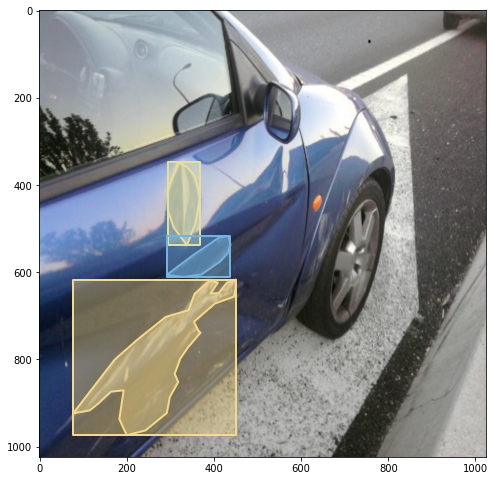

In [18]:
plt.imshow(I)
plt.axis('on')
coco.showAnns(annotation_files, draw_bbox=True )

## 9. Obtain the multiple damaged parts annotations


In [19]:
multiple_annotation_Ids = multiple_coco.getAnnIds(imgIds=image_Id,iscrowd=None)
multiple_annotation_files = multiple_coco.loadAnns(multiple_annotation_Ids)

In [20]:
print(multiple_annotation_Ids)

[36, 37]


In [21]:
print(multiple_annotation_files)

[{'area': 152766.00000000084, 'bbox': [4, 250, 617, 774], 'category_id': 3, 'id': 36, 'image_id': 10, 'iscrowd': 0, 'segmentation': [[4, 448, 517, 250, 525, 280, 549, 306, 565, 306, 580, 299, 586, 285, 595, 271, 611, 345, 621, 409, 613, 476, 606, 534, 599, 594, 582, 652, 568, 693, 541, 732, 371, 889, 231, 1024, 5, 1021, 5, 542]]}, {'area': 33534.00000000005, 'bbox': [563, 229, 255, 491], 'category_id': 5, 'id': 37, 'image_id': 10, 'iscrowd': 0, 'segmentation': [[752, 229, 725, 253, 653, 455, 610, 576, 582, 671, 563, 720, 597, 694, 636, 626, 695, 459, 735, 403, 774, 363, 799, 365, 799, 398, 799, 445, 799, 469, 818, 396, 808, 337, 795, 298, 770, 250, 758, 229]]}]


## 10. Create a dictionary between category_id and category name


In [22]:
category_map = dict()

for element in list(multiple_coco.cats.values()):
    category_map.update({element['id']:element['name']})

In [23]:
print(category_map)

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}


## 11. Create a list of parts in the image


Parts are: ['door', 'front_bumper']


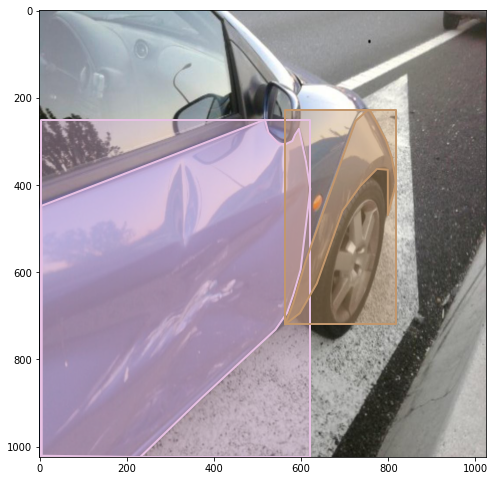

In [24]:
parts = []
for region in multiple_annotation_files:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(image_directory + '/' + image['file_name'])
plt.imshow(I)
plt.axis('on')
multiple_coco.showAnns(multiple_annotation_files, draw_bbox=True )

# Part 2: Detectron2 Car Damaged Parts Detection Model

## 12. Training Object detection model using Detectron 2

### Install detectron 2


In [25]:
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
     |████████████████████████████████| 6.1MB 740kB/s 
     |████████████████████████████████| 81kB 4.2MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 112kB 27.5MB/s 
     |████████████████████████████████| 645kB 36.2MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=263979 sha256=828545d291d58cf975964984b0bf8282bb20d2b750915353a2f9033310fff80e
  Stored in directory: /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=2555a8bf82b48dd8a0090005c681d7441d21fe8ffa935062a533b4a0eaa9838d
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp

### Import the libraries for torchvision, detectron2

In [26]:
!pip install torch==1.7.0

     |████████████████████████████████| 776.8MB 24kB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.7.0 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.7.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102


In [27]:
!pip install torchvision==0.8.1

     |████████████████████████████████| 12.7MB 258kB/s 
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


In [28]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0 True


## Import the necessay libraries of detectron2

In [29]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

## Checking for the correct versions of CUDA, detectron, PyTorch

In [30]:
!python -m detectron2.utils.collect_env

----------------------  ---------------------------------------------------------
sys.platform            linux
Python                  3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.4 @/usr/local/lib/python3.7/dist-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.2
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.0 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     True
GPU available           True
GPU 0                   Tesla K80 (arch=3.7)
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.8.1 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5
fvcore                  0.1.3.post20210317
cv2                     4.1.2
----------------------  ---------------------------------------------------------
PyTorch bu

## 13. Using Car Damaged Parts Dataset

In [31]:
dataset_directory = "/content/drive/MyDrive/CarPartsDamageDetection/archive/"
image_directory = "/content/drive/MyDrive/CarPartsDamageDetection/archive/img/"
train_directory = "/content/drive/MyDrive/CarPartsDamageDetection/archive/train/"
validation_directory = "/content/drive/MyDrive/CarPartsDamageDetection/archive/val/"

In [32]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, os.path.join(dataset_directory,train_directory,"COCO_train_annotations.json"), os.path.join(dataset_directory,image_directory))
register_coco_instances("car_dataset_validation", {}, os.path.join(dataset_directory,validation_directory,"COCO_validation_annotations.json"), os.path.join(dataset_directory,image_directory))

In [33]:
print(register_coco_instances)

<function register_coco_instances at 0x7f3aa7abf8c0>


In [34]:
dataset_dictionaries = DatasetCatalog.get("car_dataset_train")
metadata_dictionaries = MetadataCatalog.get("car_dataset_train")

[06/22 03:54:25 d2.data.datasets.coco]: Loaded 59 images in COCO format from /content/drive/MyDrive/CarPartsDamageDetection/archive/train/COCO_train_annotations.json


In [35]:
print(dataset_dictionaries)

[{'file_name': '/content/drive/MyDrive/CarPartsDamageDetection/archive/img/10.jpg', 'height': 1024, 'width': 1024, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [300, 216, 79, 22], 'category_id': 0, 'segmentation': [[379, 216, 337, 218, 300, 223, 318, 238, 350, 237, 369, 231, 375, 227]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [226, 230, 62, 34], 'category_id': 0, 'segmentation': [[288, 230, 264, 238, 245, 249, 226, 264, 241, 264, 249, 253, 269, 253, 275, 250, 284, 238]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [161, 276, 65, 68], 'category_id': 0, 'segmentation': [[161, 331, 191, 326, 200, 276, 207, 315, 226, 322, 222, 337, 196, 344, 184, 342]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [254, 273, 67, 26], 'category_id': 0, 'segmentation': [[258, 273, 289, 273, 318, 275, 321, 289, 307, 299, 283, 296, 264, 291, 254, 285]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [233, 392, 123, 95], 'category_id': 0, 

In [36]:
print(metadata_dictionaries)

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/CarPartsDamageDetection/archive/img/', json_file='/content/drive/MyDrive/CarPartsDamageDetection/archive/train/COCO_train_annotations.json', name='car_dataset_train', thing_classes=['damage'], thing_dataset_id_to_contiguous_id={1: 0})


## 14. Training the model

#### To implement our own Training Module to be used for  the COCO validation evaluation during training


In [37]:
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [38]:
!pip show torchvision

Name: torchvision
Version: 0.8.1
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: pillow, numpy, torch
Required-by: fastai


## 15. Running COCO-InstanceSegmentation algorithm on a MaskCNN 

In [39]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_validation",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.WARMUP_ITERS = 700
cfg.SOLVER.MAX_ITER = 500 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (600, 800)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # only has one class (damage) + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 2 # only has one class (damage) + 1
cfg.TEST.EVAL_PERIOD = 600



# Clear any logs from previous runs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[06/22 03:54:30 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:15, 11.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (3, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (3,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (8, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (8,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

[06/22 03:54:49 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python

[06/22 03:55:29 d2.utils.events]:  eta: 0:15:35  iter: 19  total_loss: 2.22  loss_cls: 0.9687  loss_box_reg: 0.3382  loss_mask: 0.6939  loss_rpn_cls: 0.1366  loss_rpn_loc: 0.01853  time: 1.9096  data_time: 0.0971  lr: 2.8116e-05  max_mem: 3183M
[06/22 03:56:07 d2.utils.events]:  eta: 0:14:36  iter: 39  total_loss: 1.977  loss_cls: 0.6526  loss_box_reg: 0.4487  loss_mask: 0.6842  loss_rpn_cls: 0.158  loss_rpn_loc: 0.02249  time: 1.9013  data_time: 0.0173  lr: 5.6659e-05  max_mem: 3183M
[06/22 03:56:45 d2.utils.events]:  eta: 0:14:01  iter: 59  total_loss: 1.687  loss_cls: 0.4443  loss_box_reg: 0.3986  loss_mask: 0.6613  loss_rpn_cls: 0.1187  loss_rpn_loc: 0.02051  time: 1.9132  data_time: 0.0125  lr: 8.5201e-05  max_mem: 3183M
[06/22 03:57:23 d2.utils.events]:  eta: 0:13:16  iter: 79  total_loss: 1.603  loss_cls: 0.3936  loss_box_reg: 0.4488  loss_mask: 0.6335  loss_rpn_cls: 0.0932  loss_rpn_loc: 0.01816  time: 1.9030  data_time: 0.0133  lr: 0.00011374  max_mem: 3183M
[06/22 03:58:02 d2

## 17. Model Metrics and Hyper Parameters Visualization


In [40]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_validation = last * weight + (1 - weight) * point
        smoothed.append(smoothed_validation)
        last = smoothed_validation
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'
    
    plots = []
    
    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())
        
        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [41]:
plots = plot(logdir= './output', savedir= './')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

<Figure size 1152x648 with 0 Axes>

In [42]:
plots

['./seaborn/rpn/num_pos_anchors.png',
 './seaborn/rpn/num_neg_anchors.png',
 './seaborn/roi_head/num_fg_samples.png',
 './seaborn/roi_head/num_bg_samples.png',
 './seaborn/fast_rcnn/cls_accuracy.png',
 './seaborn/fast_rcnn/fg_cls_accuracy.png',
 './seaborn/fast_rcnn/false_negative.png',
 './seaborn/mask_rcnn/accuracy.png',
 './seaborn/mask_rcnn/false_positive.png',
 './seaborn/mask_rcnn/false_negative.png',
 './seaborn/data_time.png',
 './seaborn/total_loss.png',
 './seaborn/loss_cls.png',
 './seaborn/loss_box_reg.png',
 './seaborn/loss_mask.png',
 './seaborn/loss_rpn_cls.png',
 './seaborn/loss_rpn_loc.png',
 './seaborn/lr.png',
 './seaborn/time.png',
 './seaborn/eta_seconds.png',
 './seaborn/bbox/AP.png',
 './seaborn/bbox/AP50.png',
 './seaborn/bbox/AP75.png',
 './seaborn/bbox/APs.png',
 './seaborn/bbox/APm.png',
 './seaborn/bbox/APl.png',
 './seaborn/segm/AP.png',
 './seaborn/segm/AP50.png',
 './seaborn/segm/AP75.png',
 './seaborn/segm/APs.png',
 './seaborn/segm/APm.png',
 './seaborn

#### Plots for different model metrics

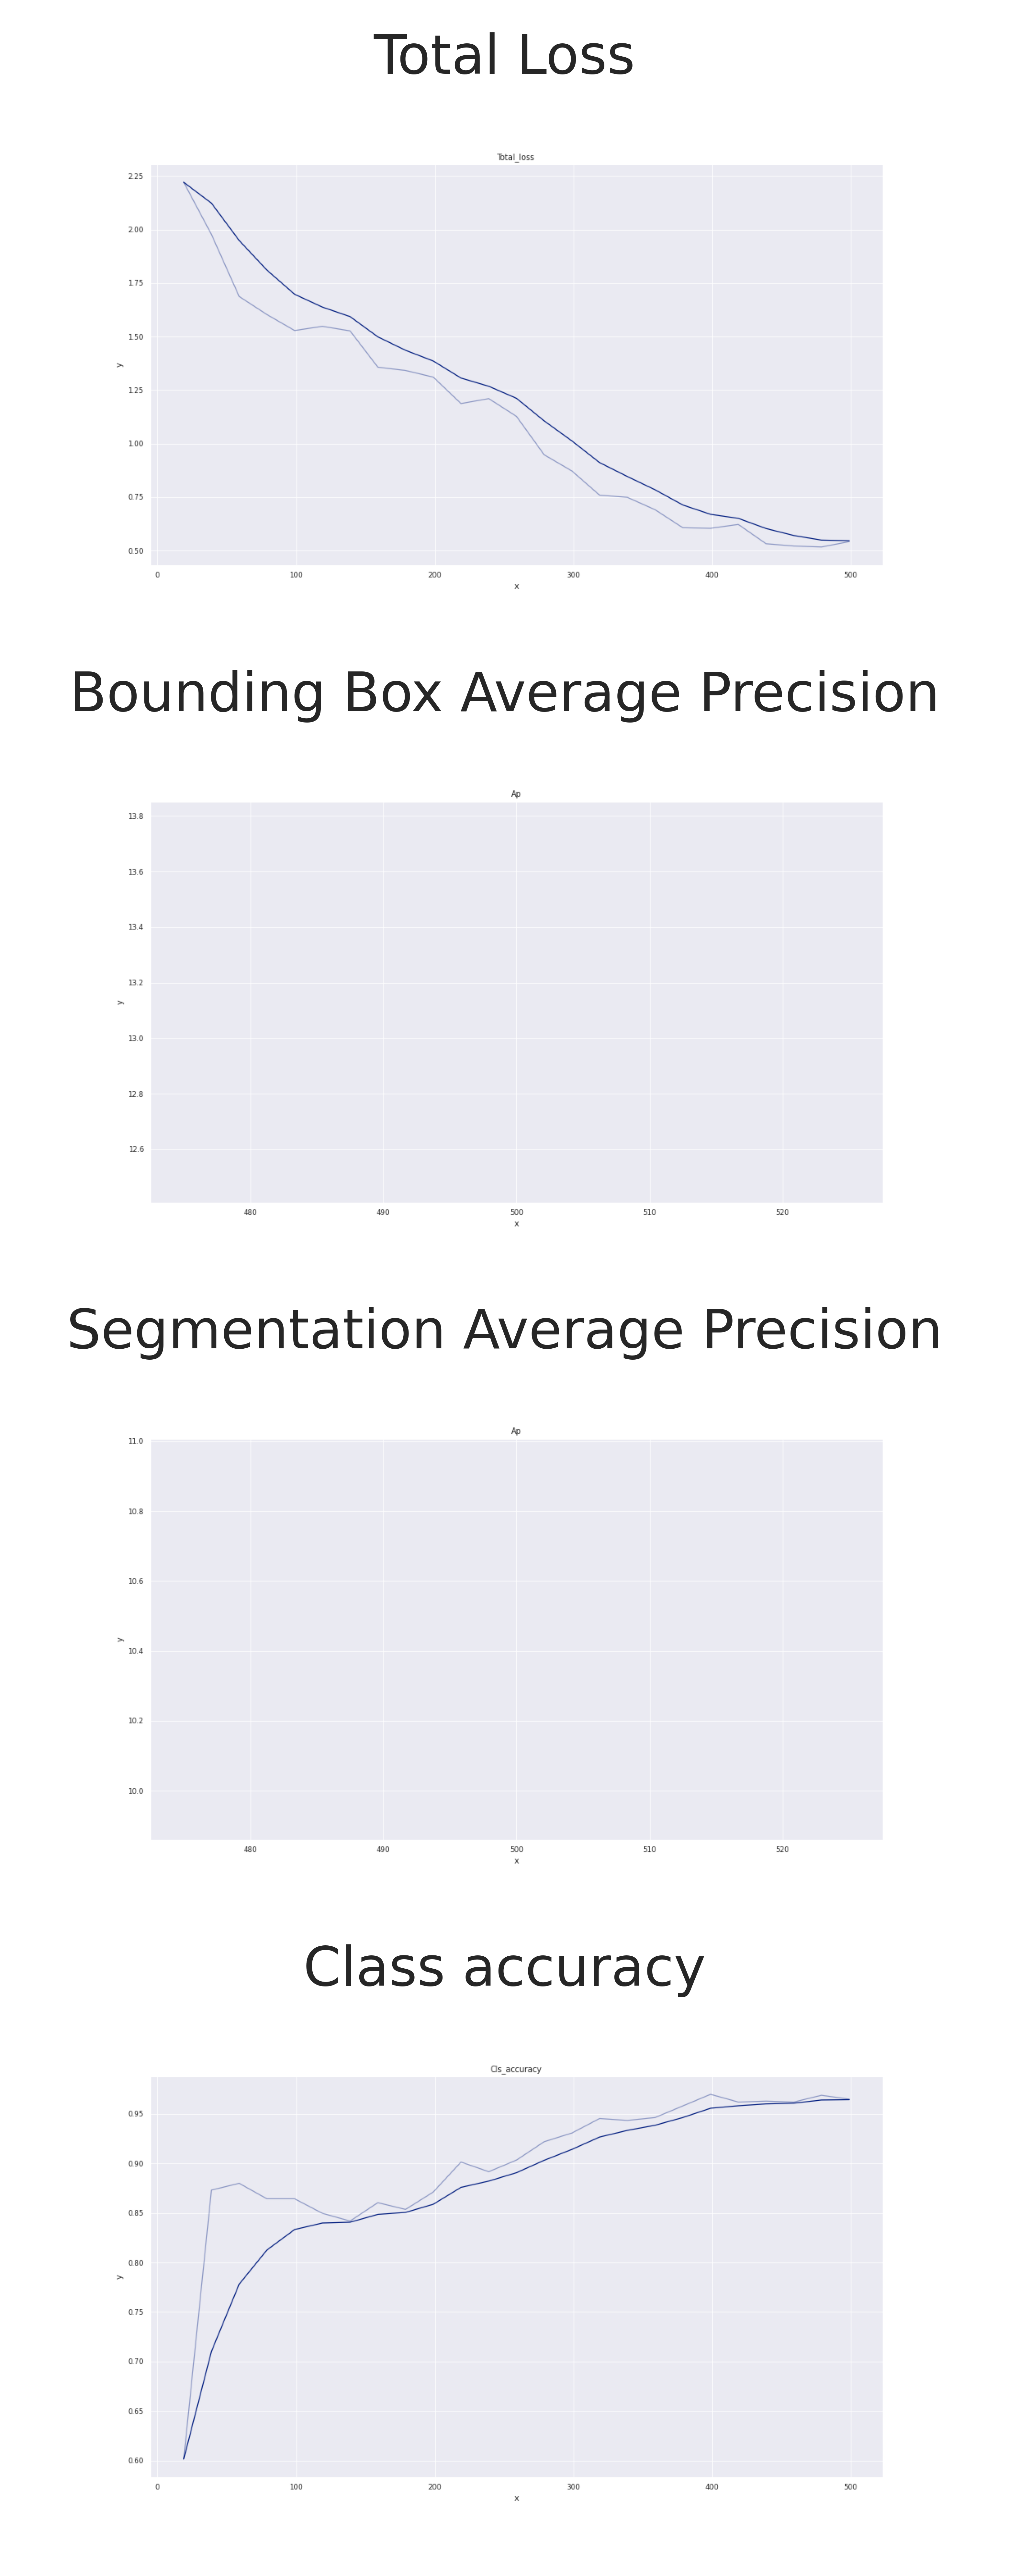

In [43]:
my_dpi = 1000
fig, ax = plt.subplots(4,1, figsize = (12,10), dpi=my_dpi)


ax[0].set_title('Total Loss', fontsize=12)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

ax[1].set_title('Bounding Box Average Precision', fontsize=12)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

ax[2].set_title('Segmentation Average Precision', fontsize=12)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

ax[3].set_title('Class accuracy', fontsize=12)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

## 17. Evaluate the Model

In [44]:
evaluator = COCOEvaluator("car_dataset_validation", cfg, False, output_dir="./output/")
validation_loader = build_detection_test_loader(cfg, "car_dataset_validation")
print(inference_on_dataset(trainer.model, validation_loader, evaluator))

WARNING [06/22 04:11:23 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[06/22 04:11:23 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/CarPartsDamageDetection/archive/val/COCO_validation_annotations.json
[06/22 04:11:23 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/22 04:11:23 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[06/22 04:11:23 d2.data.common]: Serialized dataset takes 0.01 MiB
[06/22 04:11:23 d2.evaluation.evaluator]: Start inference on 11 images
[06/22 04:11:27 d2.evaluation.evaluator]: Inference done 11/11. 0.2691 s / img. ETA=0:00:00
[06/22 04:11:27 d2.evaluation.evaluator]: Total inference time: 0:00:02.062052 (0.343675 s / img per device, on 1 devices)
[06/22 04:11:27 d2.evalua

## 18. Conclusions drawn from the car parts damage detection model

In [45]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_validation", )
predictor = DefaultPredictor(cfg)

In [46]:
valid_dataset_dictionaries = DatasetCatalog.get("car_dataset_validation")
valid_metadata_dictionaries = MetadataCatalog.get("car_dataset_validation")

[06/22 04:11:28 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/CarPartsDamageDetection/archive/val/COCO_validation_annotations.json


In [47]:
print(valid_dataset_dictionaries)

[{'file_name': '/content/drive/MyDrive/CarPartsDamageDetection/archive/img/1.jpg', 'height': 1024, 'width': 1024, 'image_id': 0, 'annotations': [{'iscrowd': 0, 'bbox': [364, 143, 190, 490], 'category_id': 0, 'segmentation': [[454, 143, 388, 296, 364, 424, 375, 505, 422, 597, 495, 633, 516, 577, 554, 489, 539, 349, 550, 259, 539, 210, 521, 166, 495, 150]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}, {'iscrowd': 0, 'bbox': [391, 622, 172, 202], 'category_id': 0, 'segmentation': [[528, 622, 505, 675, 392, 675, 391, 712, 409, 778, 432, 824, 477, 822, 528, 785, 560, 729, 563, 688, 548, 662, 537, 647]], 'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}, {'file_name': '/content/drive/MyDrive/CarPartsDamageDetection/archive/img/22.jpg', 'height': 1024, 'width': 1024, 'image_id': 1, 'annotations': [{'iscrowd': 0, 'bbox': [626, 318, 179, 261], 'category_id': 0, 'segmentation': [[626, 326, 673, 318, 730, 337, 765, 370, 798, 406, 803, 440, 797, 466, 797, 491, 805, 522, 794, 579, 784, 543, 777, 505, 761, 468, 730, 42

In [48]:
print(valid_metadata_dictionaries)

Metadata(evaluator_type='coco', image_root='/content/drive/MyDrive/CarPartsDamageDetection/archive/img/', json_file='/content/drive/MyDrive/CarPartsDamageDetection/archive/val/COCO_validation_annotations.json', name='car_dataset_validation', thing_classes=['damage'], thing_dataset_id_to_contiguous_id={1: 0})


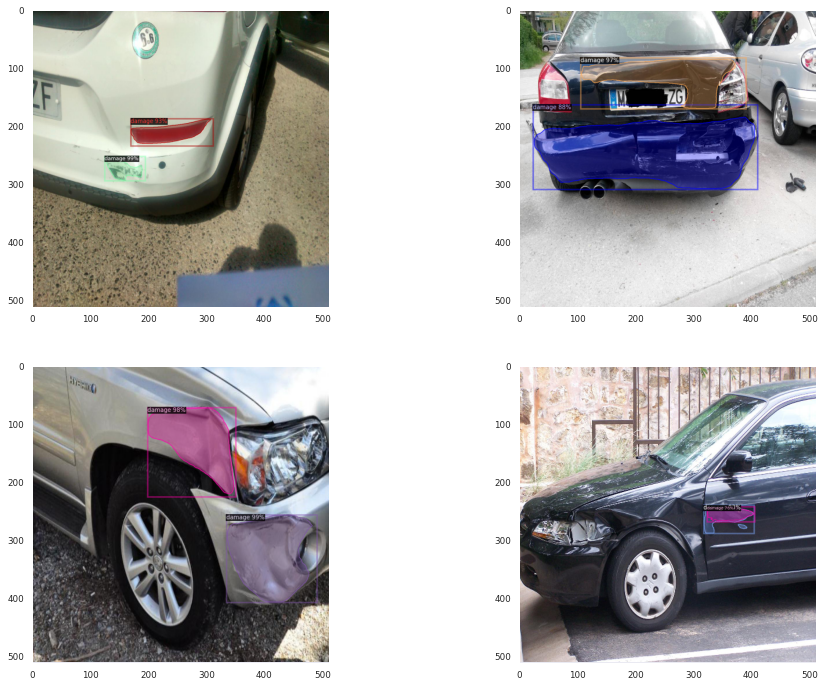

In [49]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(valid_dataset_dictionaries, 4):
    i=i+1    
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=valid_metadata_dictionaries, 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])